<IPython.core.display.Javascript object>


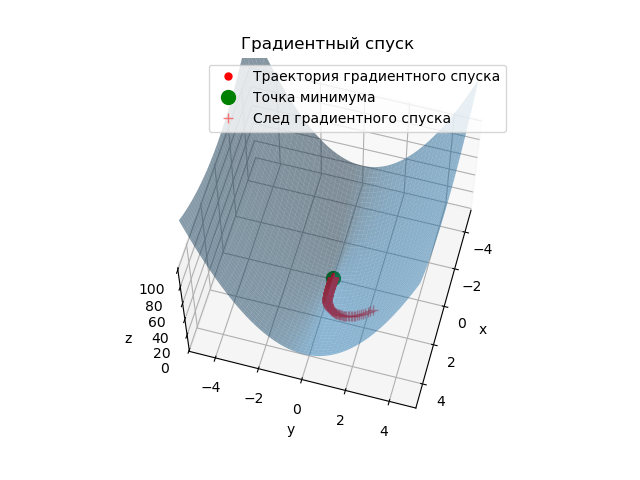

Точка минимума: x = 0.0000985941977627, y = 0.0000000000000010, z = 0.0000000097208158


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

%matplotlib notebook

# Определение функции, которую мы минимизируем
def z_f(x, y):
    return x ** 2 + 5 * y ** 2 # z = x^2 + 5y^2

# Производная функции z_f по x
def dz_dx(x, y):
    return 2 * x

# Производная функции z_f по y
def dz_dy(x, y):
    return 10 * y

# Функция для выполнения градиентного спуска
def gradient_descent(x_start, y_start, lmd):
    eps = 0.000001  # Точность остановки
    x_list = [x_start]
    y_list = [y_start]
    z_list = [z_f(x_start, y_start)]

    while True:
        # Обновление значений x и y по правилам градиентного спуска
        new_x = x_list[-1] - lmd * dz_dx(x_list[-1], y_list[-1]) # x new = x old - lmd * dz_dx
        new_y = y_list[-1] - lmd * dz_dy(x_list[-1], y_list[-1]) # y new = y old - lmd * dz_dy
        
        # Округление новых значений до 16 знаков после запятой
        new_x = round(new_x, 16)
        new_y = round(new_y, 16)

        # Добавление новых значений в списки
        x_list.append(new_x)
        y_list.append(new_y)
        z_list.append(z_f(new_x, new_y))

        # Проверка условия остановки
        if ((x_list[-2] - x_list[-1]) ** 2 + (y_list[-2] - y_list[-1]) ** 2) ** 0.5 < eps:
            break

    return x_list, y_list, z_list

# Начальные значения
x_start = 2.5
y_start = 2.5
lmd = 0.005 # коэффициент обучения

# Выполнение градиентного спуска
x_list, y_list, z_list = gradient_descent(x_start, y_start, lmd)

# Создание фигуры для визуализации
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Инициализация точек
point, = ax.plot([], [], [], 'ro', markersize=5, label='Траектория градиентного спуска')
min_point, = ax.plot([], [], [], 'go', markersize=10, label='Точка минимума')  # Создаём min_point без координат
trace, = ax.plot([], [], [], 'r+', markersize=7, alpha=0.5, label='След градиентного спуска')  # След градиентного спуска

# Функция для обновления анимации
def update(i):
    point.set_data([x_list[i]], [y_list[i]])
    point.set_3d_properties([z_list[i]])
    trace.set_data(x_list[:i+1], y_list[:i+1])
    trace.set_3d_properties(z_list[:i+1])
    return point, trace

# Анимация движения точки по поверхности функции
ani = FuncAnimation(fig, update, frames=len(x_list), interval=10, repeat=False)

# Отрисовка поверхности функции
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)
z = z_f(x, y)
ax.plot_surface(x, y, z, alpha=0.5)

# Установка пределов осей и меток
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Установка легенды и заголовка
ax.legend()
plt.title('Градиентный спуск')

# Настройка вида
ax.view_init(elev=30, azim=30)  # Устанавливаем углы обзора для сбоку и сверху одновременно
plt.show()

# Вывод точки минимума
x_min = x_list[-1]
y_min = y_list[-1]
z_min = z_list[-1]

# Обновление координат точки минимума
min_point.set_data([x_min], [y_min])
min_point.set_3d_properties([z_min])

print(f"Точка минимума: x = {x_min:.16f}, y = {y_min:.16f}, z = {z_min:.16f}")